# Dragon Real State Price Predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("housing1.csv")

In [3]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
476    0
477    0
478    0
479    0
480    0
481    0
482    0
483    0
484    0
485    0
486    0
487    0
488    0
489    0
490    0
491    0
492    0
493    0
494    0
495    0
496    0
497    0
498    0
499    0
500    0
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.285277   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705269   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [8]:
%matplotlib inline

In [9]:
import matplotlib as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002303828C048>,
      dtype=object)

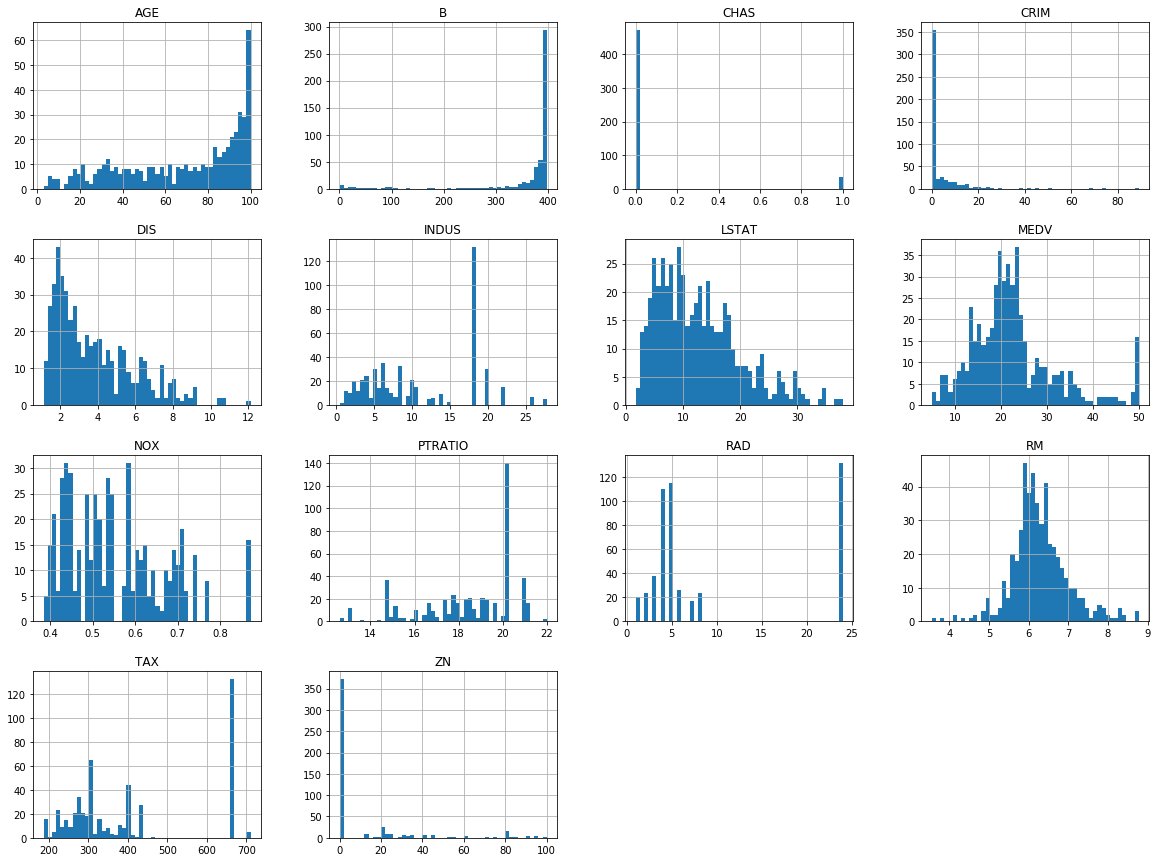

In [10]:
housing.hist(bins=50,figsize=(20,15))

# Train Test SPlitting

In [11]:
#learning purpose
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    #print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set,test_set=split_train_test(housing,0.2)

In [13]:
print("Rows in train set:",len(train_set),"\nRows in test set:",len(test_set))

Rows in train set: 405 
Rows in test set: 101


In [14]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print("Rows in train set:",len(train_set),"\nRows in test set:",len(test_set))

Rows in train set: 404 
Rows in test set: 102


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [16]:
strat_test_set

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
342   0.02498   0.0   1.89     0  0.518  6.540   59.7  6.2669    1  422   
379  17.86670   0.0  18.10     0  0.671  6.223  100.0  1.3861   24  666   
223   0.61470   0.0   6.20     0  0.507  6.618   80.8  3.2721    8  307   
219   0.11425   0.0  13.89     1  0.550  6.373   92.4  3.3633    5  276   
48    0.25387   0.0   6.91     0  0.448  5.399   95.3  5.8700    3  233   
134   0.97617   0.0  21.89     0  0.624  5.757   98.4  2.3460    4  437   
49    0.21977   0.0   6.91     0  0.448  5.602   62.0  6.0877    3  233   
448   9.32909   0.0  18.10     0  0.713  6.185   98.7  2.2616   24  666   
197   0.04666  80.0   1.52     0  0.404  7.107   36.6  7.3090    2  329   
273   0.22188  20.0   6.96     1  0.464  7.691   51.8  4.3665    3  223   
495   0.17899   0.0   9.69     0  0.585  5.670   28.8  2.7986    6  391   
374  18.49820   0.0  18.10     0  0.668  4.138  100.0  1.1370   24  666   
360   4.54192   0.0  18.10     0  0.770  6.398   88.0  2.5182   24  666   
407  11.95110   0.0  18.10     0  0.659  5.608  100.0  1.2852   24  666   
336   0.03427   0.0   5.19     0  0.515  5.869   46.3  5.2311    5  224   
383   7.99248   0.0  18.10     0  0.700  5.520  100.0  1.5331   24  666   
284   0.00906  90.0   2.97     0  0.400  7.088   20.8  7.3073    1  285   
34    1.61282   0.0   8.14     0  0.538  6.096   96.9  3.7598    4  307   
320   0.16760   0.0   7.38     0  0.493  6.426   52.3  4.5404    5  287   
221   0.40771   0.0   6.20     1  0.507  6.164   91.3  3.0480    8  307   
130   0.34006   0.0  21.89     0  0.624  6.458   98.9  2.1185    4  437   
106   0.17120   0.0   8.56     0  0.520  5.836   91.9  2.2110    5  384   
380  88.97620   0.0  18.10     0  0.671  6.968   91.9  1.4165   24  666   
176   0.07022   0.0   4.05     0  0.510  6.020   47.2  3.5549    5  296   
102   0.22876   0.0   8.56     0  0.520  6.405   85.4  2.7147    5  384   
290   0.03502  80.0   4.95     0  0.411  6.861   27.9  5.1167    4  245   
451   5.44114   0.0  18.10     0  0.713  6.655   98.2  2.3552   24  666   
275   0.09604  40.0   6.41     0  0.447  6.854   42.8  4.2673    4  254   
385  16.81180   0.0  18.10     0  0.700  5.277   98.1  1.4261   24  666   
198   0.03768  80.0   1.52     0  0.404  7.274   38.3  7.3090    2  329   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
230   0.53700   0.0   6.20     0  0.504  5.981   68.1  3.6715    8  307   
330   0.04544   0.0   3.24     0  0.460  6.144   32.2  5.8736    4  430   
196   0.04011  80.0   1.52     0  0.404  7.287   34.1  7.3090    2  329   
489   0.18337   0.0  27.74     0  0.609  5.414   98.3  1.7554    4  711   
153   2.14918   0.0  19.58     0  0.871  5.709   98.5  1.6232    5  403   
255   0.03548  80.0   3.64     0  0.392  5.876   19.1  9.2203    1  315   
335   0.03961   0.0   5.19     0  0.515  6.037   34.5  5.9853    5  224   
322   0.35114   0.0   7.38     0  0.493  6.041   49.9  4.7211    5  287   
87    0.07151   0.0   4.49     0  0.449  6.121   56.8  3.7476    3  247   
505   0.04741   0.0  11.93     0  0.573  6.030   80.8  2.5050    1  273   
424   8.79212   0.0  18.10     0  0.584  5.565   70.6  2.0635   24  666   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
50    0.08873  21.0   5.64     0  0.439  5.963   45.7  6.8147    4  243   
480   5.82401   0.0  18.10     0  0.532  6.242   64.7  3.4242   24  666   
420  11.08740   0.0  18.10     0  0.718  6.411  100.0  1.8589   24  666   
71    0.15876   0.0  10.81     0  0.413  5.961   17.5  5.2873    4  305   
502   0.04527   0.0  11.93     0  0.573  6.120   76.7  2.2875    1  273   
58    0.15445  25.0   5.13     0  0.453  6.145   29.2  7.8148    8  284   
21    0.85204   0.0   8.14     0  0.538  5.965   89.2  4.0123    4  307   
80    0.04113  25.0   4.86     0  0.426  6.727   33.5  5.4007    4  281   
398  38.35180   0.0  18.10     0  0.693  5.453  100.0  1.4896   24  666   
272   0.11460  20.0   6.96     0  

In [17]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [18]:
housing=strat_train_set.copy()

# looking for correlations

In [19]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679782
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002303C1469E8>,
      dtype=object)

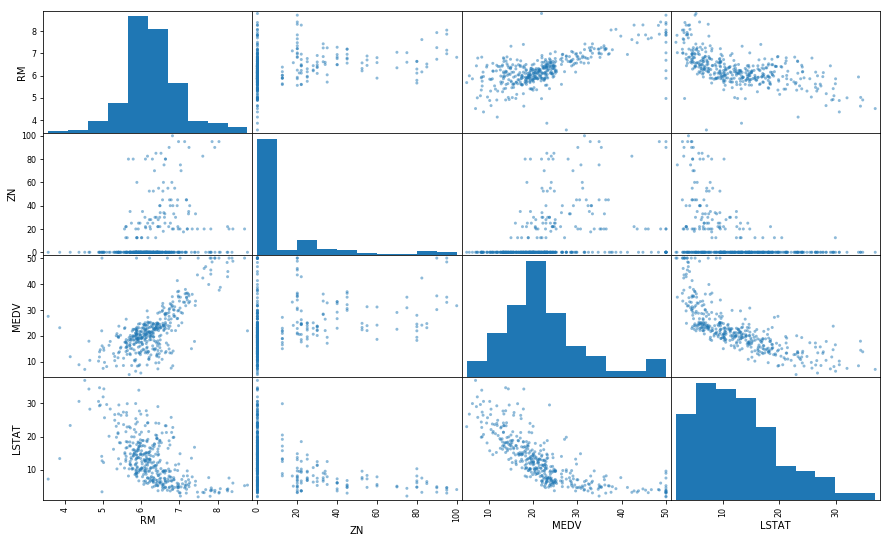

In [20]:
from pandas.plotting import scatter_matrix
attributes=["RM","ZN","MEDV","LSTAT"]
scatter_matrix(housing[attributes],figsize=(15,9))

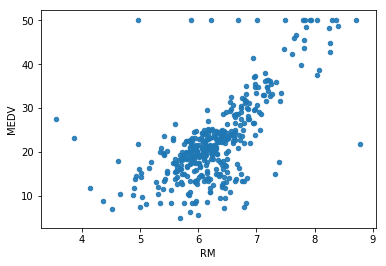

In [21]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.9)

# Trying Attribute combinations

In [22]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [23]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
411    100.045065
250     50.870973
100     57.083395
429    104.388715
57      37.558685
413    129.194956
115     72.874494
490    139.603377
199     57.634409
494     65.980425
142     74.588192
113     70.912672
468    112.386095
400    111.241022
247     53.003534
151     74.574389
408    118.568631
68      61.673221
365    187.026116
81      42.453543
93      43.471261
456    111.445783
116     69.948187
27      50.768976
234     45.643770
          ...    
433    103.480423
430    104.914934
479    106.919249
438    112.215670
38      46.765002
18      56.268328
97      34.204982
266     37.639008
133     75.060117
449    103.786816
477    125.565611
171     68.537415
180     24.855119
158     66.435872
279     31.708749
109     61.647134
82      44.589019
386    143.164230
418    111.801242
126     33.493675
446    105.030752
101     56.628816
277     37.210665
405    117.191624
367    172

In [24]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679782
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526513
LSTAT     -0.740494
Name: MEDV, dtype: float64

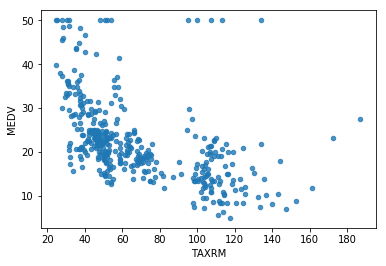

In [25]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [26]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

# Missing Attributes

In [27]:
# To take care of missing attributes, you have three options:
#     1.Get rid of the missing data points
#     2.Get rid of the whole attribute
#     3.Set the value to some value(0,mean or median)

In [28]:
housing.dropna(subset=["RM"])#option 1
#Note that orignal dataset is same

CRIM     ZN  INDUS  CHAS     NOX     RM    AGE     DIS  RAD  TAX  \
254   0.04819   80.0   3.64     0  0.3920  6.108   32.0  9.2203    1  315   
348   0.01501   80.0   2.01     0  0.4350  6.635   29.7  8.3440    4  280   
476   4.87141    0.0  18.10     0  0.6140  6.484   93.6  2.3053   24  666   
321   0.18159    0.0   7.38     0  0.4930  6.376   54.3  4.5404    5  287   
326   0.30347    0.0   7.38     0  0.4930  6.312   28.9  5.4159    5  287   
411  14.05070    0.0  18.10     0  0.5970  6.657  100.0  1.5275   24  666   
250   0.14030   22.0   5.86     0  0.4310  6.487   13.0  7.3967    7  330   
100   0.14866    0.0   8.56     0  0.5200  6.727   79.9  2.7778    5  384   
429   9.33889    0.0  18.10     0  0.6790  6.380   95.6  1.9682   24  666   
57    0.01432  100.0   1.32     0  0.4110  6.816   40.5  8.3248    5  256   
413  28.65580    0.0  18.10     0  0.5970  5.155  100.0  1.5894   24  666   
115   0.17134    0.0  10.01     0  0.5470  5.928   88.2  2.4631    6  432   
490   0.20746    0.0  27.74     0  0.6090  5.093   98.0  1.8226    4  711   
199   0.03150   95.0   1.47     0  0.4030  6.975   15.3  7.6534    3  402   
494   0.27957    0.0   9.69     0  0.5850  5.926   42.6  2.3817    6  391   
142   3.32105    0.0  19.58     1  0.8710  5.403  100.0  1.3216    5  403   
113   0.22212    0.0  10.01     0  0.5470  6.092   95.4  2.5480    6  432   
468  15.57570    0.0  18.10     0  0.5800  5.926   71.0  2.9084   24  666   
400  25.04610    0.0  18.10     0  0.6930  5.987  100.0  1.5888   24  666   
247   0.19657   22.0   5.86     0  0.4310  6.226   79.2  8.0555    7  330   
151   1.49632    0.0  19.58     0  0.8710  5.404  100.0  1.5916    5  403   
408   7.40389    0.0  18.10     0  0.5970  5.617   97.9  1.4547   24  666   
68    0.13554   12.5   6.07     0  0.4090  5.594   36.8  6.4980    4  345   
365   4.55587    0.0  18.10     0  0.7180  3.561   87.9  1.6132   24  666   
81    0.04462   25.0   4.86     0  0.4260  6.619   70.4  5.4007    4  281   
93    0.02875   28.0  15.04     0  0.4640  6.211   28.9  3.6659    4  270   
456   4.66883    0.0  18.10     0  0.7130  5.976   87.9  2.5806   24  666   
116   0.13158    0.0  10.01     0  0.5470  6.176   72.5  2.7301    6  432   
27    0.95577    0.0   8.14     0  0.5380  6.047   88.8  4.4534    4  307   
234   0.44791    0.0   6.20     1  0.5070  6.726   66.5  3.6519    8  307   
..        ...    ...    ...   ...     ...    ...    ...     ...  ...  ...   
433   5.58107    0.0  18.10     0  0.7130  6.436   87.9  2.3158   24  666   
430   8.49213    0.0  18.10     0  0.5840  6.348   86.1  2.0527   24  666   
479  14.33370    0.0  18.10     0  0.6140  6.229   88.0  1.9512   24  666   
438  13.67810    0.0  18.10     0  0.7400  5.935   87.9  1.8206   24  666   
38    0.17505    0.0   5.96     0  0.4990  5.966   30.2  3.8473    5  279   
18    0.80271    0.0   8.14     0  0.5380  5.456   36.6  3.7965    4  307   
97    0.12083    0.0   2.89     0  0.4450  8.069   76.0  3.4952    2  276   
266   0.78570   20.0   3.97     0  0.6470  7.014   84.6  2.1329    5  264   
133   0.32982    0.0  21.89     0  0.6240  5.822   95.4  2.4699    4  437   
449   7.52601    0.0  18.10     0  0.7130  6.417   98.3  2.1850   24  666   
477  15.02340    0.0  18.10     0  0.6140  5.304   97.3  2.1007   24  666   
171   2.31390    0.0  19.58     0  0.6050  5.880   97.3  2.3887    5  403   
180   0.06588    0.0   2.46     0  0.4880  7.765   83.3  2.7410    3  193   
158   1.34284    0.0  19.58     0  0.6050  6.066  100.0  1.7573    5  403   
279   0.21038   20.0   3.33     0  0.4429  6.812   32.2  4.1007    5  216   
109   0.26363    0.0   8.56     0  0.5200  6.229   91.2  2.5451    5  384   
82    0.03659   25.0   4.86     0  0.4260  6.302   32.2  5.4007    4  281   
386  24.39380    0.0  18.10     0  0.7000  4.652  100.0  1.4672   24  666   
418  73.53410    0.0  18.10     0  0.6790  5.957  100.0  1.8026   24  666   
126   0.38735    0.0  25.65     0  0.5810  5.613   95.6  1.7572    2  188   
446  

In [29]:
housing.drop("RM",axis=1)#option 2
#Note that there won't be rm column but orignal data set is same

CRIM     ZN  INDUS  CHAS     NOX    AGE     DIS  RAD  TAX  PTRATIO  \
254   0.04819   80.0   3.64     0  0.3920   32.0  9.2203    1  315     16.4   
348   0.01501   80.0   2.01     0  0.4350   29.7  8.3440    4  280     17.0   
476   4.87141    0.0  18.10     0  0.6140   93.6  2.3053   24  666     20.2   
321   0.18159    0.0   7.38     0  0.4930   54.3  4.5404    5  287     19.6   
326   0.30347    0.0   7.38     0  0.4930   28.9  5.4159    5  287     19.6   
411  14.05070    0.0  18.10     0  0.5970  100.0  1.5275   24  666     20.2   
250   0.14030   22.0   5.86     0  0.4310   13.0  7.3967    7  330     19.1   
100   0.14866    0.0   8.56     0  0.5200   79.9  2.7778    5  384     20.9   
429   9.33889    0.0  18.10     0  0.6790   95.6  1.9682   24  666     20.2   
57    0.01432  100.0   1.32     0  0.4110   40.5  8.3248    5  256     15.1   
413  28.65580    0.0  18.10     0  0.5970  100.0  1.5894   24  666     20.2   
115   0.17134    0.0  10.01     0  0.5470   88.2  2.4631    6  432     17.8   
490   0.20746    0.0  27.74     0  0.6090   98.0  1.8226    4  711     20.1   
199   0.03150   95.0   1.47     0  0.4030   15.3  7.6534    3  402     17.0   
494   0.27957    0.0   9.69     0  0.5850   42.6  2.3817    6  391     19.2   
142   3.32105    0.0  19.58     1  0.8710  100.0  1.3216    5  403     14.7   
113   0.22212    0.0  10.01     0  0.5470   95.4  2.5480    6  432     17.8   
468  15.57570    0.0  18.10     0  0.5800   71.0  2.9084   24  666     20.2   
400  25.04610    0.0  18.10     0  0.6930  100.0  1.5888   24  666     20.2   
247   0.19657   22.0   5.86     0  0.4310   79.2  8.0555    7  330     19.1   
151   1.49632    0.0  19.58     0  0.8710  100.0  1.5916    5  403     14.7   
408   7.40389    0.0  18.10     0  0.5970   97.9  1.4547   24  666     20.2   
68    0.13554   12.5   6.07     0  0.4090   36.8  6.4980    4  345     18.9   
365   4.55587    0.0  18.10     0  0.7180   87.9  1.6132   24  666     20.2   
81    0.04462   25.0   4.86     0  0.4260   70.4  5.4007    4  281     19.0   
93    0.02875   28.0  15.04     0  0.4640   28.9  3.6659    4  270     18.2   
456   4.66883    0.0  18.10     0  0.7130   87.9  2.5806   24  666     20.2   
116   0.13158    0.0  10.01     0  0.5470   72.5  2.7301    6  432     17.8   
27    0.95577    0.0   8.14     0  0.5380   88.8  4.4534    4  307     21.0   
234   0.44791    0.0   6.20     1  0.5070   66.5  3.6519    8  307     17.4   
..        ...    ...    ...   ...     ...    ...     ...  ...  ...      ...   
433   5.58107    0.0  18.10     0  0.7130   87.9  2.3158   24  666     20.2   
430   8.49213    0.0  18.10     0  0.5840   86.1  2.0527   24  666     20.2   
479  14.33370    0.0  18.10     0  0.6140   88.0  1.9512   24  666     20.2   
438  13.67810    0.0  18.10     0  0.7400   87.9  1.8206   24  666     20.2   
38    0.17505    0.0   5.96     0  0.4990   30.2  3.8473    5  279     19.2   
18    0.80271    0.0   8.14     0  0.5380   36.6  3.7965    4  307     21.0   
97    0.12083    0.0   2.89     0  0.4450   76.0  3.4952    2  276     18.0   
266   0.78570   20.0   3.97     0  0.6470   84.6  2.1329    5  264     13.0   
133   0.32982    0.0  21.89     0  0.6240   95.4  2.4699    4  437     21.2   
449   7.52601    0.0  18.10     0  0.7130   98.3  2.1850   24  666     20.2   
477  15.02340    0.0  18.10     0  0.6140   97.3  2.1007   24  666     20.2   
171   2.31390    0.0  19.58     0  0.6050   97.3  2.3887    5  403     14.7   
180   0.06588    0.0   2.46     0  0.4880   83.3  2.7410    3  193     17.8   
158   1.34284    0.0  19.58     0  0.6050  100.0  1.7573    5  403     14.7   
279   0.21038   20.0   3.33     0  0.4429   32.2  4.1007    5  216     14.9   
109   0.26363    0.0   8.56     0  0.5200   91.2  2.5451    5  384     20.9   
82    0.03659   25.0   4.86     0  0.4260   32.2  5.4007    4  281     19.0   
386  24.39380    0.0  18.10     0  0.7000  100.0  1.4672   24  666     20.2   
418  73.53410    0.0  18.10     0  0.6790  100.0  1.8026   

In [30]:
median=housing["RM"].median()#option3 median compute
median
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
411    6.657
250    6.487
100    6.727
429    6.380
57     6.816
413    5.155
115    5.928
490    5.093
199    6.975
494    5.926
142    5.403
113    6.092
468    5.926
400    5.987
247    6.226
151    5.404
408    5.617
68     5.594
365    3.561
81     6.619
93     6.211
456    5.976
116    6.176
27     6.047
234    6.726
       ...  
433    6.436
430    6.348
479    6.229
438    5.935
38     5.966
18     5.456
97     8.069
266    7.014
133    5.822
449    6.417
477    5.304
171    5.880
180    7.765
158    6.066
279    6.812
109    6.229
82     6.302
386    4.652
418    5.957
126    5.613
446    6.341
101    6.781
277    6.826
405    5.683
367    3.863
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
housing.describe()#befor imputer missing value in rm

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  400.000000   
mean     3.602814   10.836634   11.344950    0.069307    0.558064    6.279583   
std      8.099383   22.150636    6.877817    0.254290    0.116875    0.715822   
min      0.006320    0.000000    0.740000    0.000000    0.389000    3.561000   
25%      0.086963    0.000000    5.190000    0.000000    0.453000    5.877250   
50%      0.286735    0.000000    9.900000    0.000000    0.538000    6.210000   
75%      3.731923   12.500000   18.100000    0.000000    0.631000    6.630250   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.039851    3.746210    9.735149  412.341584   18.473267  353.392822   
std     28.258248    2.099057    8.731259  168.672623    2.129243   96.069235   
min      2.900000    1.129600    1.000000  187.000000   13.000000    0.320000   
25%     44.850000    2.035975    4.000000  284.000000   17.400000  374.617500   
50%     78.200000    3.122200    5.000000  337.000000   19.000000  390.955000   
75%     94.100000    5.100400   24.000000  666.000000   20.200000  395.630000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.791609  
std      7.235740  
min      1.730000  
25%      6.847500  
50%     11.570000  
75%     17.102500  
max     36.980000

In [32]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [33]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
X=imputer.transform(housing)

In [35]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [36]:
housing_tr.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.602814   10.836634   11.344950    0.069307    0.558064    6.278894   
std      8.099383   22.150636    6.877817    0.254290    0.116875    0.712294   
min      0.006320    0.000000    0.740000    0.000000    0.389000    3.561000   
25%      0.086963    0.000000    5.190000    0.000000    0.453000    5.878750   
50%      0.286735    0.000000    9.900000    0.000000    0.538000    6.210000   
75%      3.731923   12.500000   18.100000    0.000000    0.631000    6.630000   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.039851    3.746210    9.735149  412.341584   18.473267  353.392822   
std     28.258248    2.099057    8.731259  168.672623    2.129243   96.069235   
min      2.900000    1.129600    1.000000  187.000000   13.000000    0.320000   
25%     44.850000    2.035975    4.000000  284.000000   17.400000  374.617500   
50%     78.200000    3.122200    5.000000  337.000000   19.000000  390.955000   
75%     94.100000    5.100400   24.000000  666.000000   20.200000  395.630000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.791609  
std      7.235740  
min      1.730000  
25%      6.847500  
50%     11.570000  
75%     17.102500  
max     36.980000

# Scikit-learn Design

Primarily, three types of objects

1.Estimators-Estimates some parameter based on dataset. Eg. ImputerIt has a fit and transform method. 
Fit method fits dataset and calculates internal paramaters.

2.Transformers-Transform method takes input and returns output based on the learnings from fit().It also has a convenience function called fit_transform() which fits and then transforms.

3.Predictors-LinearRegression model is an example of predictor. fit and predict are two common functions. It also gives some
score function which will evaluate the prediction.

# Feature Scaling

In [37]:
# Priarily, Two types of feature scaling methods
# 1.Min-max scaling(Normalization):
#     (value-min)/(max-min)
#     sklearn provides a class called MinMaxScaler

# 2.Standardization:
#             (value-mean)/standarddeviation
#             sklearn provides a class called standard scaler


# Creating Pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [39]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [40]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [41]:
housing_num_tr.shape


(404, 13)

# Selecting a desired model for Dragon Real Estates

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
some_data=housing.iloc[:5]

In [44]:
some_labels=housing_labels.iloc[:5]

In [45]:
preapred_data=my_pipeline.transform(some_data)

In [46]:
model.predict(preapred_data)

array([23.04, 25.3 , 15.72, 23.39, 23.94])

In [47]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
# lin_mse=mean_squared_error(housing_labels,housing_predictions)
# lin_rmse=np.sqrt(lin_mse)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [49]:
rmse

1.3800290569476434

# Using better evaluation technique-Cross validation

In [50]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [51]:
rmse_scores

array([2.80134114, 3.05899752, 4.4075188 , 2.71677939, 3.44811071,
       2.98733577, 5.67152096, 3.51408487, 3.29415619, 3.81622261])

In [52]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("standard Deviation",scores.std())

In [53]:
print_scores(rmse_scores)

Scores: [2.80134114 3.05899752 4.4075188  2.71677939 3.44811071 2.98733577
 5.67152096 3.51408487 3.29415619 3.81622261]
Mean: 3.571606796837666
standard Deviation 0.8480533079784703


# Saving the model

In [54]:
from sklearn.externals import joblib
joblib.dump(model,"Dragon.joblib")

['Dragon.joblib']

# Testing the model on test data

In [55]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_preapred=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_preapred)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
# print(final_predictions,list(y_test))

In [56]:
final_rmse

3.042406329619665

In [57]:
preapred_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24021732, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# USing the model

In [61]:
from sklearn.externals import joblib
import numpy as np
model=joblib.load('Dragon.joblib')
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24021732, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
print("The price of house is:",int(model.predict(features)),"k")

The price of house is: 23 k
